# Penn State STAT501 - Applied Regression Models

![](https://www.engr.psu.edu/ae/thesis/portfolios/2014/gvl5037/penn%20state%20logo.png)

source: [Penn State Statistics 501](https://newonlinecourses.science.psu.edu/stat501/node/251/)

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

---
# Lesson 1: Simple Linear Regression



## Example 1: Teen Birth Rate and Poverty Level 

source: [1.10 Further Example PSU STAT501](https://newonlinecourses.science.psu.edu/stat501/node/288/)

![](https://psmag.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_600/MTI3NTgxOTc4Mjk0ODA4NTQ2/sad-piggy-bank.webp)

_(PHOTO: DOODER/[SHUTTERSTOCK](http://www.shutterstock.com/))_


The variables are y = year 2002 birth rate per 1000 females 15 to 17 years old and x = poverty rate, which is the percent of the stateâ€™s population living in households with incomes below the federally defined poverty level. _(Data source: Mind On Statistics, 3rd edition, Utts and Heckard)._

In [2]:
poverty = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/examples/poverty/index.txt")
poverty.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


The plot of the data below (birth rate on the vertical) shows a generally linear relationship, on average, with a positive slope. As the poverty level increases, the birth rate for 15 to 17 year old females tends to increase as well.

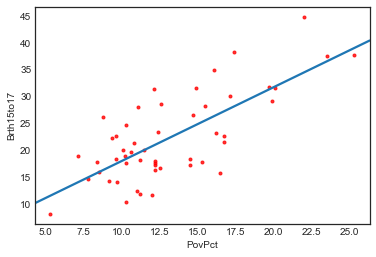

In [3]:
# Scatter plot least swares regression line added
sns.regplot(poverty.PovPct, poverty.Brth15to17, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

In [4]:
#create fitted model
lm = smf.ols(formula='Brth15to17 ~ PovPct', data = poverty).fit()

print(lm.params,'\n')

Intercept    4.267293
PovPct       1.373345
dtype: float64 



#### Interpretation of the coefficients
With the _fitted line_ for regression superimposed on the data, the above output is the intercept and slope. 
- __Slope__ = 1.373 which means that 15 to 17 year old birth rate increate 1.973 units, on average, for each one unit (one percent) increate in the poverty rate


- __Intercept__ = 4.267 means that if there were states with pvoerty rate = 0, the predicted average for the 15 to 17 year old birth rate would be 4.267 for those states. _since there are no states with poverty rate = 0 this incerpretation of the incercept is not practiceally meaningul for this example. 



In [5]:
# r-squared
print("r-squared = ", lm.rsquared)

r-squared =  0.5333279627871969


#### Interpretation of the R-Squared
The value of r2 can be interpreted to mean that poverty rates "explain" 53.3% of the observed variation in the 15 to 17 year old average birth rates of the states.

__The next plot graphs our trend line (green), the observations (dots), and our confidence interval (red).__

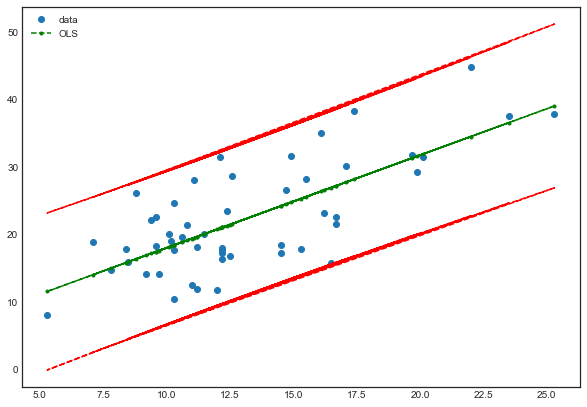

In [18]:
# https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# predictor variable (x) and dependent variable (y)
x = poverty[['PovPct']]
y = poverty[['Brth15to17']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(lm)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, lm.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

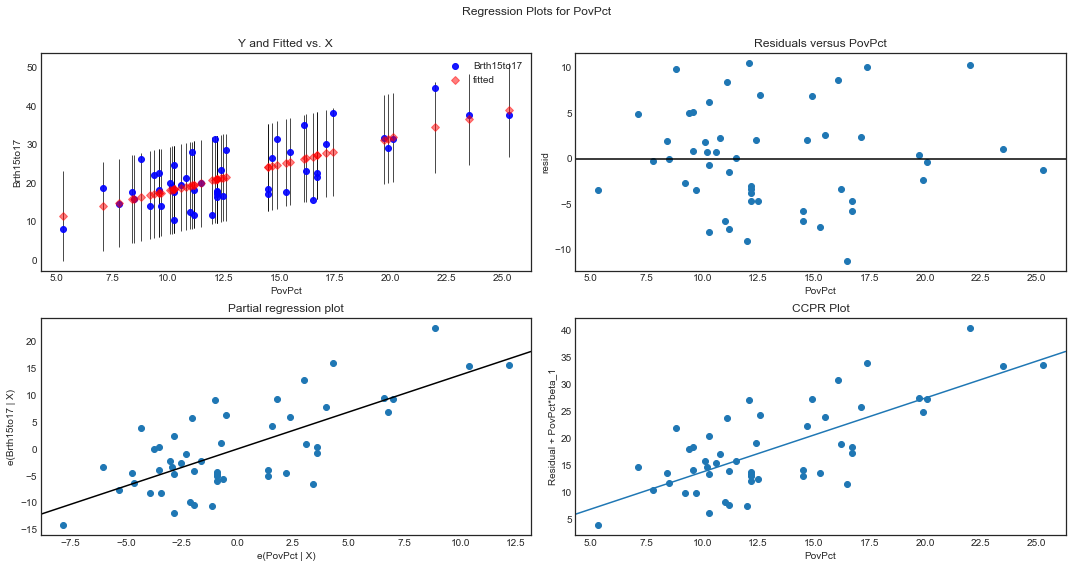

In [8]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(lm, "PovPct", fig=fig)

--- 
# Skin Cancer

![](https://static1.squarespace.com/static/592d7e08414fb5ddd3b0eef8/t/5b07026b6d2a73b58ecbc21c/1527186056008/Skin-Cancer-Prevention.jpg)

__Objective:__ this example is concerning the relationship between __skin cancer__ `mortaility` and `state latitude`. The __(y) response__ is the `mortality rate` _(number of deaths per 10 million people)_ or white males due to malignant skin melanoma from 1950-1959. The __(x) predictor__ is the `latitude` at the center of each of the 49 states in the United States.  

data source: https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/skincancer/index.txt

A subset of the data looks as such:

In [9]:
cancer = pd.read_csv("./data/skincancer.csv")
cancer.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


## Is there a relationship between state latitude and skin cancer mortality?

Below is a scatterplot of the statistical relationship of the response variable y is the mortality due to skin cancer (number of deaths per 10 million people) and the predictor variable x is the latitude (degrees North) at the center of each of 49 states in the U.S.

beta = [ 389.189 , -5.978 ]
R=-0.825, 
p_value=0.000, 
stderr=0.598


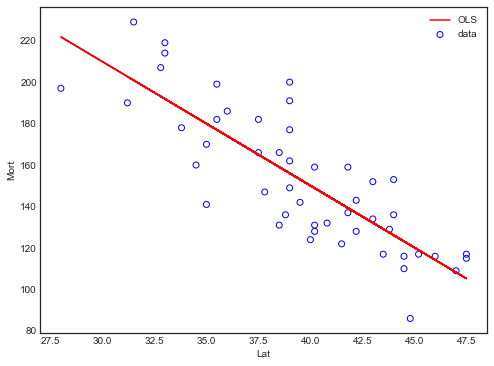

In [10]:
# https://nbviewer.jupyter.org/github/mscaudill/IntroStatLearn/blob/master/notebooks/Ch3_Linear_Regression/Lab_Linear_Regression.ipynb
# create a figure to plot our data and OLS estimate
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(cancer.Lat.values, cancer.Mort.values, facecolors='none',
          edgecolors='b', label='data')
ax.set_xlabel('Lat')
ax.set_ylabel('Mort')

# call scipy linregress returning fit coefficients and simple statistics
beta1, beta0, r_value, p_value, stderr = stats.linregress(cancer.Lat.values,
                                                         cancer.Mort.values)

# add the estimation to the data plot
ax.plot(cancer.Lat.values, beta0 + beta1 * cancer.Lat.values,
       color = 'r', label = 'OLS')
ax.legend(loc='best')

# print the regression estimates and returned from scipy
print('beta = [', round(beta0,3), ',', round(beta1,3),']')
print('R={0:.3f}, \np_value={1:.3f}, \nstderr={2:.3f}'.format(r_value, p_value, stderr))

There appears to be a negative linear relationship between latitude and mortality due to skin cancer, but the relationship is not perfect.

To answer the question _Is there a relationship between state latitude and skin cancer mortality?_ 

Certainly, since the estimated slope of the line, b1, is -5.98, not 0, there is a relationship between state latitude and skin cancer mortality in the sample of 49 data points. _But, we want to know if there is a relationship between the population of all of the latitudes and skin cancer mortality rates._

In [11]:
# Ordinary Least Squares (ols) 

#create fitted model
cancer_model = smf.ols(formula='Mort ~ Lat', data = cancer).fit()

print("r-squared = ", cancer_model.rsquared)

r-squared =  0.6798295922599593


#### interpreting r-squared
we can say that 68% of the variation in the skin cancer mortality rate is reduced by taking into account latitude. 

Or we can say - with knownledge of what it really means - __that 68% of the variation in skin cancer mortality is _due to_ or is _explained by_ latitude__

In [12]:
print("Pearson correlaiton of Lat and Mort = ", np.sqrt(cancer_model.rsquared))

Pearson correlaiton of Lat and Mort =  0.8245177937800732


#### INterpreting Pearson's R

The output tells us that the correlation between skin cancer mortality and latitude is still -0.825.

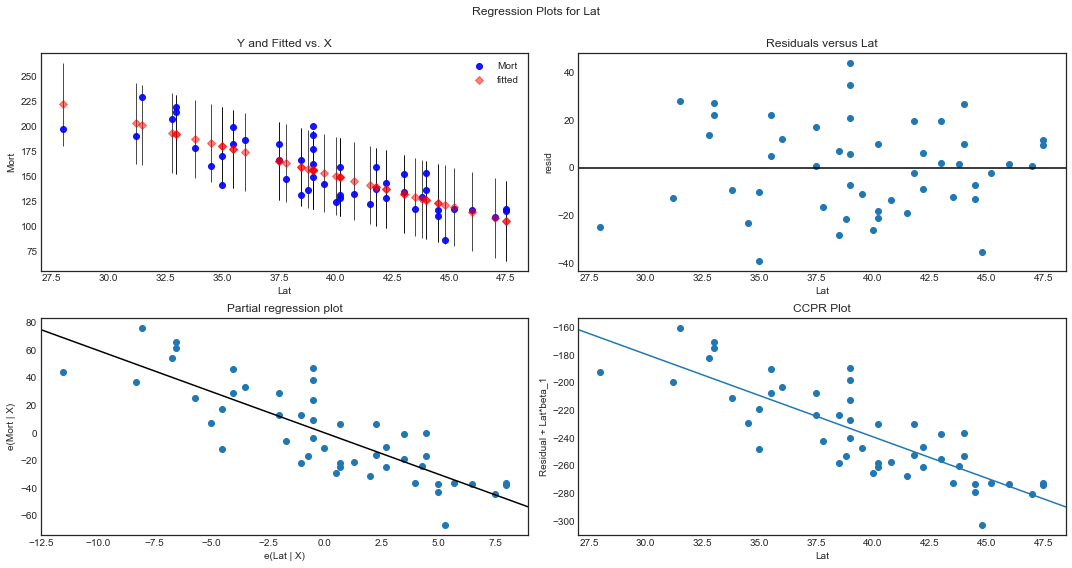

In [14]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(cancer_model, "Lat", fig=fig)

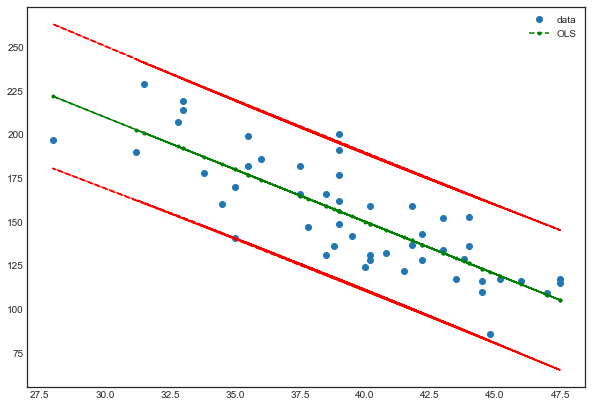

In [17]:
# https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# predictor variable (x) and dependent variable (y)
x = cancer[['Lat']]
y = cancer[['Mort']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(cancer_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, cancer_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

## Hypothesis Test and Confidence Internval 

Null hypothesis H0 : Î²1 = some number Î² _(in other words, we  can test whether or not the population slope takes on any value)_

Alternative hypothesis HA : Î²1 â‰  some number Î²

By default, the thest conducts the hypothesis test with null hypothesis, Î²1 is equal to 0, and alternative hypothesis, Î²1 is not equal to 0.

Then we calculate the value of the test statistic using the t-distribution:

$$t^*=\frac{b_1-\beta}{\left(\frac{\sqrt{MSE}}{\sqrt{\sum(x_i-\bar{x})^2}} \right)}=\frac{b_1-\beta}{se(b_1)}$$

we use the resulting test statistic to calculate the `P-value`. As always, the P-value is the answer to the question __"how likely is it that weâ€™d get a test statistic t* as extreme as we did if the null hypothesis were true?"__



#### Confidence internval

$$b_1 \pm t_{(\alpha/2, n-2)}\times \left( \frac{\sqrt{MSE}}{\sqrt{\sum(x_i-\bar{x})^2}} \right)$$

The results of the __confidence internval__ gives us:
1. a range of values that is likely to contain the true unknown value Î²1
2. allows us to answer the question: _"is the predictor x linearly related to the response y?"_

If the confidence internval for Î²1 contains 0, then we __conclude that there is no evidence of a linear relationship between the predictor x and the response y in the population__

On the other hand, if the confidence internval for Î²1 does not contain 0, then we __conclude that there is evidence of a linear relationship between the predictor x and the response y in the population__


In [13]:
print(cancer_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     99.80
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           3.31e-13
Time:                        23:12:25   Log-Likelihood:                -213.08
No. Observations:                  49   AIC:                             430.2
Df Residuals:                      47   BIC:                             433.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    389.1894     23.812     16.344      0.0

### Drawing Conclusions
After we calculated the hypothesis test and the confidence interval for the slope Î²1, we can see on the line pertaining to the `latitude` preidctor a summary of statistics including:
- `coef` = -5.9776
- `std err` = 0.598 _(standard effeor of the coefficient)_
- `t statistic` = -9.99 _(output from deviding coef by the estimated standard error; assuming that the slope is 0)_

##### Interpreting Hypothesis Test and  P-value
Because the P-value is so small (less than 0.001), we can __reject the null hypothesis and conclude that Î²1 does not equal 0__. There is sufficient evidence, at the Î± = 0.05 level, to conclude that __the slope is not 0, that is, there is a linear relationship in the population between skin cancer mortality and latitude.__

##### Interpreting the Confidence interaval
We can be 95% confident that the population slope is between -7.2 and -4.8. That is, we can be 95% confident that for every additional one-degree increase in latitude, the mean skin cancer mortality rate decreases between 4.8 and 7.2 deaths per 10 million people

### Running a prediction
we can just run the `summary_frame()` [function](https://github.com/statsmodels/statsmodels/issues/987#issuecomment-133575422) and the `get_prediction()` [function](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.get_prediction.html) to get the confidenc interval and the prediction interval.

In [11]:
#Statsmodel - prediction for new observation

cancer_model.get_prediction(pd.DataFrame({'Lat':[0]})).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,389.189351,23.812316,341.285151,437.093551,327.760047,450.618655


## ANOVA (F-Test)

There is an alternative method for ansering this question, in which we can use the ANOVA F-test. 


In [13]:
#create fitted model
cancer_model = smf.ols(formula='Mort ~ Lat', data = cancer).fit()

anova_ = sm.stats.anova_lm(cancer_model, typ=2)
print(anova_)

                sum_sq    df          F        PR(>F)
Lat       36464.200203   1.0  99.796827  3.309456e-13
Residual  17173.065103  47.0        NaN           NaN


##### INterpretation of ANOVA
There is a column labeled F, which contains the F-test statistic, and there is a column labeled P, which contains the P-value associated with the F-test. Notice that the P-value, 0.000, appears to be the same as the P-value, 0.000, for the t-test for the slope. The F-test similarly tells us that there is enough statistical evidence to conclude that there is a linear relationship between skin cancer mortality and latitude.

---

In [7]:
hw = pd.read_table("./data/height_weight.txt")
hw.head()

,ht,wt
0,63,127
1,64,121
2,66,142
3,69,157
4,69,162


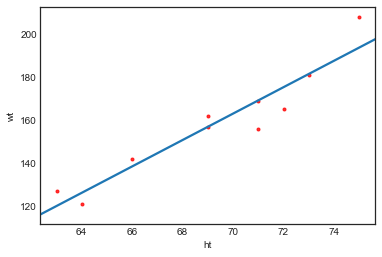

In [8]:

# Scatter plot of expense vs income with least swares regression line added

sns.regplot(hw.ht, hw.wt, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

In [9]:
# Ordinary Least Squares (ols) 

#create fitted model
lm = smf.ols(formula='wt ~ ht', data = hw).fit()

print(lm.params,'\n')

# summary of the regression coefficents
print(lm.summary())

Intercept   -266.534395
ht             6.137581
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                     wt   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.67
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           3.21e-05
Time:                        11:23:50   Log-Likelihood:                -34.639
No. Observations:                  10   AIC:                             73.28
Df Residuals:                       8   BIC:                             73.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [10]:
# ANOVA
anova_results = sm.stats.anova_lm(lm)
print(anova_results)

           df       sum_sq      mean_sq          F    PR(>F)
ht        1.0  5202.214048  5202.214048  69.666373  0.000032
Residual  8.0   597.385952    74.673244        NaN       NaN


---
# Lesson 2: SLR Model Evaluation